# Which dog breed is more popular: Golden Retriever or Standard Poodle?

As part of Udacity's Data Analysis Nanodegree program, I got the chance to analyze a dataset containing information about tweets from WeRateDogs. Although the project was more concerned with applying the data wrangling process, in the following report I will show some exploratory data analysis I performed on the cleaned data.

WeRateDogs is a Twitter account that rates people's dogs along with funny comments about the dogs. It really has grown to become a community with over 4 million followers. I was provided with some data about WeRateDogs tweets from which I gather additional information by using Tweepy API. After cleaning the data, I ended up with information regarding over a 1,000 tweets that include each tweet id, timestamp, text, expanded url, rating, name of the dog, breed, dog stage, retweet count and favorite count.

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [3]:
# Read csv document into a pandas dataframe
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4202,25094,NaN
1,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,8730,42254,NaN
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9499,40406,NaN
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3146,20263,NaN
4,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,19100,65715,NaN


After some data wrangling, I started to analyze the dataset. The first thing I wanted to know was what the most popular dog name of the set was.

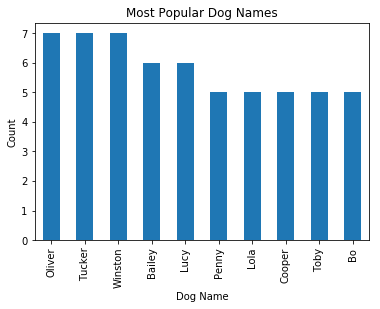

In [10]:
dog_names = df['name'].value_counts()
dog_names.head(10).plot(kind='bar', title='Most Popular Dog Names')
plt.xlabel('Dog Name')
plt.ylabel('Count');

Three dog names are tied for the most popular name: Winston, Tucker and Oliver. Bailey and Lucy share the second place and Bella, Penny, Lola, Copper and Bo are tied for the third place.

The WeRateDogs community has a particular way of describing the stage in the life of the dog. They use 4 stages, as described the their Dogtionary: 
- Doggo, "a big pupper, usually older."
- Pupper, "a small doggo, usually younger."
- Puppo, "a transitional phase between pupper and doggo."
- Floof, "any dog really; however, this label is commonly given to dogs with seemingly excess fur."

My next analysis focused on which dog stage was popular.

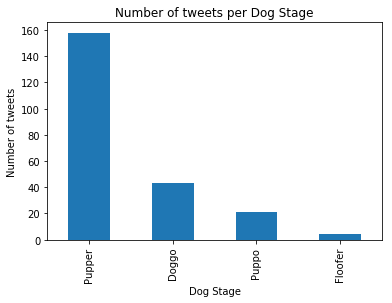

In [9]:
df['dog_stage'].value_counts().plot(kind='bar', title='Number of tweets per Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Number of tweets');

Most of the tweets didn't provide a stage for the dog. From those that stated the dog stage, most of them were Pupper.

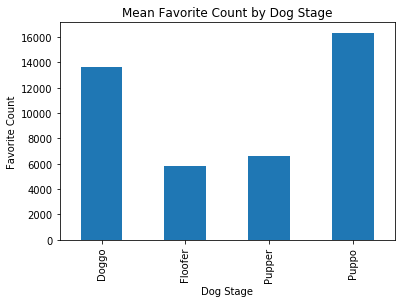

In [8]:
df_favorite_stage = df.groupby('dog_stage')['favorite_count'].mean()
df_favorite_stage.plot(kind='bar', title='Mean Favorite Count by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Favorite Count');

Puppo is the dog stage that received more favorite counts in average, with around 16,000 favorites, followed by Doggo with around 14,000 and Pupper and Floofer both at around 6,000.

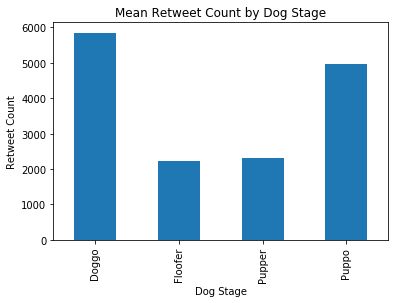

In [7]:
df_retweet_stage = df.groupby('dog_stage')['retweet_count'].mean()
df_retweet_stage.plot(kind='bar', title='Mean Retweet Count by Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Retweet Count');

Doggo is the dog stage that in average has more retweets with around 6,000 retweets followed by puppo with 5,000, and Pupper and Floofer each with around 2,000 retweets.

After analyzing the dog stage, I proceeded to analyze the dog breeds.

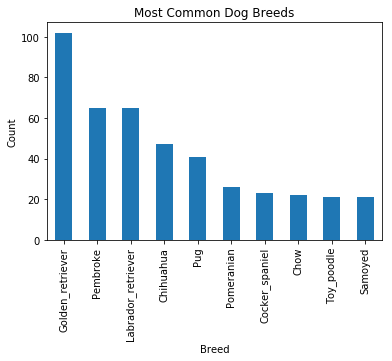

In [6]:
dog_breed = df['p1'].value_counts()
dog_breed.head(10).plot(kind='bar', title='Most Common Dog Breeds')
plt.xlabel('Breed')
plt.ylabel('Count');

The most common breed type is by far, the Golden Retriever, followed by the Pembroke and Labrador Retriever.

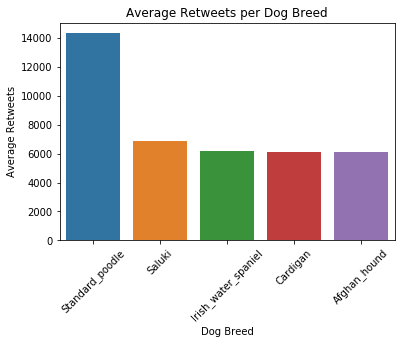

In [5]:
df_p1_dog = df[(df['p1_dog']==True)]
df_retweet_breed = df_p1_dog.groupby('p1')['retweet_count'].mean().reset_index()
df_retweet_breed = df_retweet_breed.rename(columns={'retweet_count' : 'retweet_mean'})
df_retweet_breed.sort_values('retweet_mean', ascending=False, inplace=True)
fig = sns.barplot(x='p1', y='retweet_mean', data=df_retweet_breed.head())
plt.xticks(rotation=45)
plt.xlabel('Dog Breed')
plt.ylabel('Average Retweets')
plt.title('Average Retweets per Dog Breed')
plt.show(fig);


Standard Poodle is the dog breed that in average got more retweets.

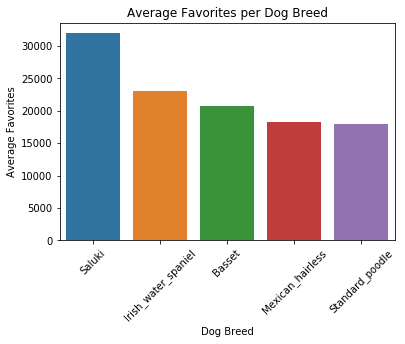

In [13]:
df_p1_dog = df[(df['p1_dog']==True)]
df_favorite_breed = df_p1_dog.groupby('p1')['favorite_count'].mean().reset_index()
df_favorite_breed = df_favorite_breed.rename(columns={'favorite_count' : 'favorite_mean'})
df_favorite_breed.sort_values('favorite_mean', ascending=False, inplace=True)
fig2 = sns.barplot(x='p1', y='favorite_mean', data=df_favorite_breed.head())
plt.xticks(rotation=45)
plt.xlabel('Dog Breed')
plt.ylabel('Average Favorites')
plt.title('Average Favorites per Dog Breed')
plt.show(fig2);

Saluki is the dog breed that in average received more favorites. That makes sense because Saluki was also one of the most retweeted dog breeds. Standard poodle, the top retweeted dog breed, also appears as one of the breeds with most favorites.

It caught my attention that the most retweeted dog breeds were also the ones that received more favorites, so I decided to explore the relationship betweet retweet count and favorite count.

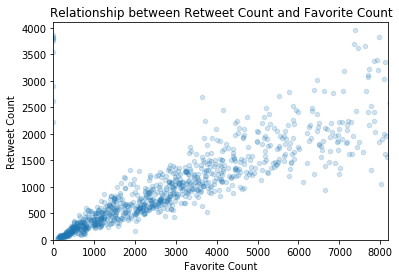

In [14]:
df.plot(x='favorite_count', y='retweet_count', kind='scatter', title='Relationship between Retweet Count and Favorite Count', alpha=1/5)
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.ylim([0, 4100])
plt.xlim([0,8200]);

There is a positive correlation between Retweet count and favorite count. However the favorite count increases more rapidly than the retweet count. For example, one tweet with 2000 retweets has about 4000 to 5000 favorites. It seems that people use the favorite feature more often than the retweet feature.

In conclusion, it seems that the most common rated dog in WeRateDogs is a Golden Retriever named Winston, Tucker or Oliver. And if you happen to own a Saluki or Standard Poodle pupper, you have a preety popular dog, at least among the WeRateDogs community. Obviously, there are several limitiations regarding this analysis: no formal statistical analysis was performed in the dataset to prove causation of any sort and I only got access to tweets before August 2017, so the trends in the WeRateDogs might be different at the current time. For future work, it could be really interesting to analyze the effect that the time of posting has in the retweet and favorite count of the tweet.